In [1]:
import pandas as pd
from pandas_datareader import data as wb

/home/matteo/snap/jupyter/common/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
start_date = '2013-01-01'
end_date = '2019-01-01'
assets = ['T', 'WMB', 'IRM', 'MO', 'PM','D','PGR','GIL','IBM','VZ']
#Dataframe 
pf_data = pd.DataFrame()
#Fills the dataframe
for ticker in assets:
    pf_data[ticker] = wb.DataReader(ticker, data_source = 'yahoo', 
                                    start =  start_date , 
                                    end = end_date)['Adj Close']

In [3]:
pf_data.head()

,T,WMB,IRM,MO,PM,D,PGR,GIL,IBM,VZ
Date,,,,,,,,,,
2013-01-02,23.313316,22.792261,18.507345,22.803123,60.790401,39.564640,18.259525,16.348482,149.965622,31.665064
2013-01-03,23.326637,22.618120,18.847721,22.817139,60.173691,39.609505,18.545750,16.545771,149.140732,31.514851
2013-01-04,23.466520,22.865936,19.153488,22.803123,60.636219,40.028179,18.747795,16.671326,148.163147,31.686523
2013-01-07,23.573093,22.765472,19.038105,22.747055,60.447018,39.370258,18.537334,16.653391,147.513916,31.965479
2013-01-08,23.175035,22.484159,18.807341,22.522816,60.334873,39.153439,18.503662,16.917952,147.307709,31.187595


In [4]:
pf_data.tail()

,T,WMB,IRM,MO,PM,D,PGR,GIL,IBM,VZ
Date,,,,,,,,,,
2018-12-24,24.961506,18.905266,27.797482,43.361641,61.177139,67.106422,54.579239,29.156595,101.585991,49.836876
2018-12-26,25.618389,19.906565,29.094820,44.154839,62.002480,68.219833,56.740604,30.163006,105.193497,51.142685
2018-12-27,25.682251,19.713654,29.176470,44.401005,61.835560,69.116219,57.572636,29.899191,107.450539,51.809689
2018-12-28,25.965075,19.732027,29.385134,44.574230,62.382690,69.125656,57.046638,29.547436,106.742264,51.922417
2018-12-31,26.038063,20.255642,29.403276,45.030094,61.909748,67.427231,57.696964,29.664688,107.346657,52.814873


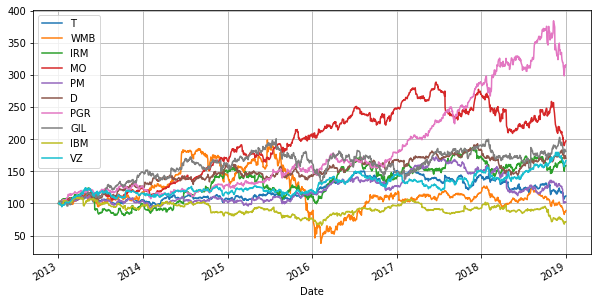

In [12]:
(pf_data/pf_data.iloc[0]*100).plot(figsize=(10,5), grid= True);

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
log_returns =np.log(pf_data/pf_data.shift(1))
log_returns.head()

,T,WMB,IRM,MO,PM,D,PGR,GIL,IBM,VZ
Date,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.000571,-0.007670,0.018224,0.000614,-0.010197,0.001133,0.015554,0.011995,-0.005516,-0.004755
2013-01-04,0.005979,0.010897,0.016093,-0.000614,0.007657,0.010515,0.010836,0.007560,-0.006576,0.005433
2013-01-07,0.004531,-0.004403,-0.006042,-0.002462,-0.003125,-0.016573,-0.011289,-0.001076,-0.004391,0.008765
2013-01-08,-0.017030,-0.012434,-0.012195,-0.009907,-0.001857,-0.005522,-0.001818,0.015761,-0.001399,-0.024636


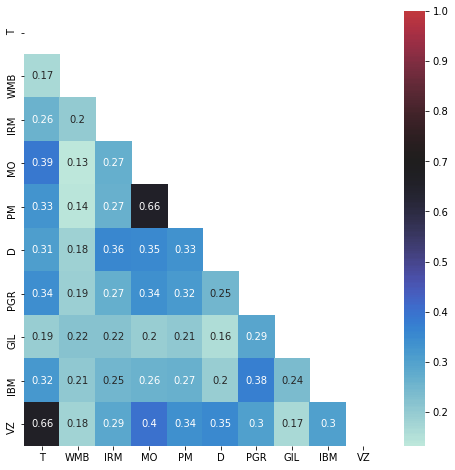

In [21]:
threshold = 0.7
correlation = log_returns.corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(8,8))
sns.heatmap(correlation,center= threshold,annot=True,mask=mask);

In [30]:
pf_weights= np.array([.1, .1, .1, .1, .1, .1, .1, .1, .1, .1])
returns = np.around(np.sum(pf_weights* log_returns.mean())*250,4)  
volatility = np.around(np.sqrt(np.dot(pf_weights.T, np.dot(log_returns.cov()*250,pf_weights))),4)
print(returns)
print(volatility)

0.0598
0.1253
